In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# this datetimestamp allows us to create a datetime stano or
# specefic date object

from datetime import datetime

In [6]:
# conversion of variables into datetime object

In [8]:
years = 2918
month = 9
day = 24
hour = 12
minute = 30
second = 15

date = datetime(year,month,day)
date

datetime.datetime(2918, 9, 24, 0, 0)

In [5]:
date_time = datetime(year,month,day,hour,minute,second)
date_time

datetime.datetime(2918, 9, 24, 12, 30, 15)

In [9]:
# retrieval of objects from datetime object

print('date_time.day:',date_time.day)
print('date_time.hour:',date_time.hour)
print('date_time.minute:',date_time.minute)
print('date_time.second:',date_time.second)
print('date_time.year:',date_time.year)

date_time.day: 24
date_time.hour: 12
date_time.minute: 30
date_time.second: 15
date_time.year: 2918


In [12]:
# create an exaple datetime list
list_date = [datetime(2018,9,24),datetime(2016,9,25)]
print(list_date)
print(type(list_date))

[datetime.datetime(2018, 9, 24, 0, 0), datetime.datetime(2016, 9, 25, 0, 0)]
<class 'list'>


In [15]:
# convert to date time index
dt_date = pd.DatetimeIndex(list_date)
print(dt_date)
print(type(dt_date))

DatetimeIndex(['2018-09-24', '2016-09-25'], dtype='datetime64[ns]', freq=None)
<class 'pandas.core.indexes.datetimes.DatetimeIndex'>


**we created a date time index and provided it as a 
parameter in the pandas dataframe as an index. We then created a dataframe with
the indexes of the date time. This is the format in which we will see a lot of
financial data in our dataset.**

In [19]:
# considering some random data

data = np.random.randn(2,2)
print(data)
cols = ['x','y']
df = pd.DataFrame(data,dt_date,cols)
df

[[ 0.32327805  0.64058067]
 [-1.67448128  0.30607428]]


x         y
2018-09-24  0.323278  0.640581
2016-09-25 -1.674481  0.306074

**Time Resampling**

**We usually get financial data that has a date time index on a smaller time scale (such as data that is sampled every day or every hour). However, it is often a good idea to aggregate the data based on a particular frequency, such as every month, every quarter, or every year.**

In [20]:
df = pd.read_csv(r'C:\Users\kiran\Desktop\Bhaskar\DataScience\ml_projects\Finance_project\Chapter3\walmart_stock.csv')
df.head(10)      

Date       Open       High        Low      Close    Volume  Adj Close
0  2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
1  2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2  2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
3  2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
4  2012-01-09  59.029999  59.549999  58.919998  59.180000   6679300  51.616215
5  2012-01-10  59.430000  59.709999  58.980000  59.040001   6907300  51.494109
6  2012-01-11  59.060001  59.529999  59.040001  59.400002   6365600  51.808098
7  2012-01-12  59.790001  60.000000  59.400002  59.500000   7236400  51.895316
8  2012-01-13  59.180000  59.610001  59.009998  59.540001   7729300  51.930204
9  2012-01-17  59.869999  60.110001  59.520000  59.849998   8500000  52.200581

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Volume     1258 non-null   int64  
 6   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


**the Date column is not a date time object. We need to
convert the Date column into a date time object in order to set it as an index. The
simplest way to do this is by using the pandas to_datetime function**

In [22]:
df['Date'] = df['Date'].apply(pd.to_datetime)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   int64         
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [24]:
type(df)

pandas.core.frame.DataFrame

**Once we convert it into a date time object, we can see the type of the Date
column: it is a date time object. We can now set the date time as an index by
using the set_index pandas inbuilt function**

In [25]:
df.set_index('Date',inplace = True)

df.head()

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
2012-01-09  59.029999  59.549999  58.919998  59.180000   6679300  51.616215

In [26]:
df.shape

(1258, 6)

In [27]:
#Once we convert it into a date time object, we can see the type of the Date
#column: it is a date time object. We can now set the date time as an index by
#using the set_index pandas inbuilt function

df.resample(rule = 'A')

In [31]:
# to apply  the mean to resampled data
y = df.resample(rule = 'A').mean()

In [32]:
y.head()

Open       High        Low      Close        Volume  \
Date                                                                   
2012-12-31  67.158680  67.602120  66.786520  67.215120  9.239015e+06   
2013-12-31  75.264048  75.729405  74.843055  75.320516  6.951496e+06   
2014-12-31  77.274524  77.740040  76.864405  77.327381  6.515612e+06   
2015-12-31  72.569405  73.064167  72.034802  72.491111  9.040769e+06   
2016-12-31  69.481349  70.019643  69.023492  69.547063  9.371645e+06   

            Adj Close  
Date                   
2012-12-31  59.389349  
2013-12-31  68.147179  
2014-12-31  71.709712  
2015-12-31  68.831426  
2016-12-31  68.054229

In [33]:
y.shape

(5, 6)

In [35]:
y.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5 entries, 2012-12-31 to 2016-12-31
Freq: A-DEC
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5 non-null      float64
 1   High       5 non-null      float64
 2   Low        5 non-null      float64
 3   Close      5 non-null      float64
 4   Volume     5 non-null      float64
 5   Adj Close  5 non-null      float64
dtypes: float64(6)
memory usage: 280.0 bytes


In [37]:
# weekly frequency
df.resample(rule = 'w').mean()

Open       High        Low      Close      Volume  Adj Close
Date                                                                         
2012-01-08  59.737499  60.120000  59.144999  59.615000  10774925.0  51.995617
2012-01-15  59.298000  59.680000  59.070000  59.332001   6983580.0  51.748788
2012-01-22  60.085000  60.530000  59.897500  60.369999   8506200.0  52.654120
2012-01-29  61.080000  61.510000  60.722000  61.090000   6827240.0  53.282098
2012-02-05  61.702001  62.084000  61.248000  61.762000   8693500.0  53.868209
...               ...        ...        ...        ...         ...        ...
2016-12-04  70.811999  71.230000  70.534000  70.908000   7451880.0  69.890209
2016-12-11  70.318001  70.672000  69.854000  70.264000   8574600.0  69.553178
2016-12-18  71.186000  71.986001  70.887999  71.374000  10324420.0  70.853024
2016-12-25  70.980000  71.334000  70.431999  70.753999   6801820.0  70.237549
2017-01-01  69.392502  69.692499  69.115002  69.347500   5124825.0  68.841316

[261 rows x 6 columns]

In [38]:
# Daily frequenct

df.resample(rule = 'D').mean()

Open       High        Low      Close      Volume  Adj Close
Date                                                                         
2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800.0  52.619235
2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300.0  52.078475
2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200.0  51.825539
2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400.0  51.459220
2012-01-07        NaN        NaN        NaN        NaN         NaN        NaN
...               ...        ...        ...        ...         ...        ...
2016-12-26        NaN        NaN        NaN        NaN         NaN        NaN
2016-12-27  69.300003  69.820000  69.250000  69.699997   4435700.0  69.191240
2016-12-28  69.940002  70.000000  69.260002  69.309998   4875700.0  68.804087
2016-12-29  69.209999  69.519997  69.120003  69.260002   4298400.0  68.754456
2016-12-30  69.120003  69.430000  68.830002  69.120003   6889500.0  68.615479

[1824 rows x 6 columns]

**we can see that one row has NaN values. This is because the stock prices are not available for Saturdays and Sundays.**

In [39]:
# Business month end frequncy
df.resample(rule = 'BM').mean()

Open       High        Low      Close        Volume  \
Date                                                                   
2012-01-31  60.159000  60.572000  59.803000  60.235500  8.178850e+06   
2012-02-29  60.935500  61.224001  60.582500  60.898000  9.965725e+06   
2012-03-30  60.309546  60.642273  60.101818  60.433637  8.446464e+06   
2012-04-30  60.073000  60.553000  59.727000  60.149000  1.258940e+07   
2012-05-31  61.173182  61.771819  60.985455  61.456363  1.123173e+07   
2012-06-29  67.368095  67.817619  67.004285  67.503810  1.091737e+07   
2012-07-31  72.111905  72.703333  71.755715  72.406667  1.003269e+07   
2012-08-31  73.077392  73.460434  72.696957  73.044783  7.113848e+06   
2012-09-28  74.158421  74.593157  73.805790  74.181579  6.400263e+06   
2012-10-31  75.431430  75.893333  74.895714  75.306191  6.898010e+06   
2012-11-30  71.136190  71.619524  70.553333  71.109523  9.223214e+06   
2012-12-31  69.845501  70.243499  69.386500  69.711000  9.921685e+06   
2013-01-31  69.038573  69.402380  68.661904  69.094761  7.238471e+06   
2013-02-28  70.475790  71.057368  70.088947  70.623159  1.081346e+07   
2013-03-29  73.253999  73.802000  72.978499  73.436499  7.572825e+06   
2013-04-30  77.554091  78.206819  77.114546  77.689546  7.503900e+06   
2013-05-31  77.839091  78.273637  77.371818  77.816364  7.377050e+06   
2013-06-28  75.063999  75.608500  74.587500  74.978000  8.130430e+06   
2013-07-31  77.025455  77.449091  76.661818  77.115454  5.137518e+06   
2013-08-30  75.312273  75.654545  74.878181  75.224092  6.084041e+06   
2013-09-30  74.470000  74.883501  73.989500  74.439500  6.205485e+06   
2013-10-31  74.832609  75.320435  74.259130  74.979131  6.565039e+06   
2013-11-29  78.690000  79.185000  78.373000  78.973001  5.657180e+06   
2013-12-31  78.900000  79.212857  78.464286  78.775238  5.606848e+06   
2014-01-31  76.711428  77.070477  76.119999  76.531428  6.954705e+06   
2014-02-28  73.857895  74.423158  73.464736  74.055790  7.405726e+06   
2014-03-31  75.307618  75.783333  74.871905  75.302381  6.824614e+06   
2014-04-30  77.678571  78.117620  77.350000  77.808571  6.361838e+06   
2014-05-30  77.377142  77.685238  77.022857  77.380953  5.790376e+06   
2014-06-30  76.053810  76.370476  75.695715  76.010000  5.994081e+06   
2014-07-31  76.175909  76.542273  75.911819  76.210909  5.462068e+06   
2014-08-29  74.577619  74.953334  74.236667  74.676666  5.462624e+06   
2014-09-30  76.247142  76.669048  75.953810  76.336190  5.729590e+06   
2014-10-31  76.457827  77.072610  75.918261  76.488695  7.712461e+06   
2014-11-28  81.510000  82.251053  81.093684  81.885263  8.381747e+06   
2014-12-31  85.171364  85.792727  84.580455  85.125910  6.315718e+06   
2015-01-30  87.666000  88.388500  86.937500  87.609500  7.935950e+06   
2015-02-27  85.444737  85.959475  84.854210  85.523158  7.291605e+06   
2015-03-31  82.459090  83.029091  81.955454  82.473182  6.478773e+06   
2015-04-30  79.743333  80.218572  79.224762  79.560476  6.842148e+06   
2015-05-29  77.487000  77.877500  76.964501  77.336000  7.556285e+06   
2015-06-30  73.018636  73.319546  72.592272  72.797273  8.024564e+06   
2015-07-31  72.770909  73.193636  72.336364  72.750000  6.836141e+06   
2015-08-31  69.430000  70.046667  68.670476  69.286668  1.082520e+07   
2015-09-30  64.267143  64.675715  63.788095  64.252381  9.086381e+06   
2015-10-30  61.884091  62.320000  61.164091  61.564546  1.577316e+07   
2015-11-30  58.949000  59.469000  58.501000  58.912000  1.123147e+07   
2015-12-31  59.855909  60.432273  59.548636  59.986818  1.031604e+07   
2016-01-29  62.893157  63.886317  62.426315  63.221053  1.392602e+07   
2016-02-29  66.052500  66.791000  65.294001  66.248000  1.315514e+07   
2016-03-31  67.428637  68.065908  66.998636  67.555000  9.232177e+06   
2016-04-29  68.904762  69.319524  68.360951  68.825239  6.726038e+06   
2016-05-31  67.851429  68.483333  67.418095  68.052857  1.109107e+07   
2016-06-30  71.205454  71.683182  70.884091  71.346363  8

In [40]:
## we get max, min  from the above  data by applying the same  formula

# yearly max
df.resample(rule = 'A').max()

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-12-31  77.599998  77.599998  76.690002  77.150002  38007300  68.568371
2013-12-31  81.209999  81.370003  80.820000  81.209999  25683700  73.929868
2014-12-31  87.080002  88.089996  86.480003  87.540001  22812400  81.707680
2015-12-31  90.800003  90.970001  89.250000  90.470001  80898100  84.914216
2016-12-31  74.500000  75.190002  73.629997  74.300003  35076700  73.233524

In [41]:
# yearly min
df.resample(rule = 'A').min()

Open       High        Low      Close   Volume  Adj Close
Date                                                                      
2012-12-31  57.590000  58.430000  57.180000  57.360001  2904800  50.363689
2013-12-31  68.190002  68.669998  67.720001  68.300003  2094900  61.039636
2014-12-31  72.269997  73.099998  72.269997  72.660004  2491800  66.531393
2015-12-31  56.389999  57.060001  56.299999  56.419998  2482800  53.975581
2016-12-31  60.500000  61.490002  60.200001  60.840000  4234400  58.691607

In [44]:
# Daily max
df.resample(rule = 'D').max()

Open       High        Low      Close      Volume  Adj Close
Date                                                                         
2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800.0  52.619235
2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300.0  52.078475
2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200.0  51.825539
2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400.0  51.459220
2012-01-07        NaN        NaN        NaN        NaN         NaN        NaN
...               ...        ...        ...        ...         ...        ...
2016-12-26        NaN        NaN        NaN        NaN         NaN        NaN
2016-12-27  69.300003  69.820000  69.250000  69.699997   4435700.0  69.191240
2016-12-28  69.940002  70.000000  69.260002  69.309998   4875700.0  68.804087
2016-12-29  69.209999  69.519997  69.120003  69.260002   4298400.0  68.754456
2016-12-30  69.120003  69.430000  68.830002  69.120003   6889500.0  68.615479

[1824 rows x 6 columns]

In [45]:
# Daily min
df.resample(rule = 'D').min()

Open       High        Low      Close      Volume  Adj Close
Date                                                                         
2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800.0  52.619235
2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300.0  52.078475
2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200.0  51.825539
2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400.0  51.459220
2012-01-07        NaN        NaN        NaN        NaN         NaN        NaN
...               ...        ...        ...        ...         ...        ...
2016-12-26        NaN        NaN        NaN        NaN         NaN        NaN
2016-12-27  69.300003  69.820000  69.250000  69.699997   4435700.0  69.191240
2016-12-28  69.940002  70.000000  69.260002  69.309998   4875700.0  68.804087
2016-12-29  69.209999  69.519997  69.120003  69.260002   4298400.0  68.754456
2016-12-30  69.120003  69.430000  68.830002  69.120003   6889500.0  68.615479

[1824 rows x 6 columns]

**Time Shifts**

**when we are predicting prices or stocks, certain models or algorithms
that we use require us to move our data forward or backward a certain amount of
time steps. Fortunately, pandas provides us with a lot of inbuilt tools to
implement this functionality. This movement with respect to time steps is called timeshifts.**

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataframe = pd.read_csv(r'C:\Users\kiran\Desktop\Bhaskar\DataScience\ml_projects\Finance_project\Chapter3\walmart_stock.csv',index_col = 'Date')
dataframe.index = pd.to_datetime(dataframe.index)
dataframe

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
2012-01-09  59.029999  59.549999  58.919998  59.180000   6679300  51.616215
...               ...        ...        ...        ...       ...        ...
2016-12-23  69.430000  69.750000  69.360001  69.540001   4803900  69.032411
2016-12-27  69.300003  69.820000  69.250000  69.699997   4435700  69.191240
2016-12-28  69.940002  70.000000  69.260002  69.309998   4875700  68.804087
2016-12-29  69.209999  69.519997  69.120003  69.260002   4298400  68.754456
2016-12-30  69.120003  69.430000  68.830002  69.120003   6889500  68.615479

[1258 rows x 6 columns]

In [49]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2012-01-03 to 2016-12-30
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Volume     1258 non-null   int64  
 5   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [50]:
dataframe.shape

(1258, 6)

In [53]:
#we provided the period value as one, so the dataframe
# is shifted downward by one time step. For this reason, the first row is made up of
# all NaN values.

z = dataframe.shift(periods = 1)
z

Open       High        Low      Close      Volume  Adj Close
Date                                                                         
2012-01-03        NaN        NaN        NaN        NaN         NaN        NaN
2012-01-04  59.970001  61.060001  59.869999  60.330002  12668800.0  52.619235
2012-01-05  60.209999  60.349998  59.470001  59.709999   9593300.0  52.078475
2012-01-06  59.349998  59.619999  58.369999  59.419998  12768200.0  51.825539
2012-01-09  59.419998  59.450001  58.869999  59.000000   8069400.0  51.459220
...               ...        ...        ...        ...         ...        ...
2016-12-23  71.239998  71.239998  69.209999  69.589996  12106800.0  69.082042
2016-12-27  69.430000  69.750000  69.360001  69.540001   4803900.0  69.032411
2016-12-28  69.300003  69.820000  69.250000  69.699997   4435700.0  69.191240
2016-12-29  69.940002  70.000000  69.260002  69.309998   4875700.0  68.804087
2016-12-30  69.209999  69.519997  69.120003  69.260002   4298400.0  68.754456

[1258 rows x 6 columns]

In [52]:
z.shape

(1258, 6)

In [56]:
dataframe

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
2012-01-09  59.029999  59.549999  58.919998  59.180000   6679300  51.616215
...               ...        ...        ...        ...       ...        ...
2016-12-23  69.430000  69.750000  69.360001  69.540001   4803900  69.032411
2016-12-27  69.300003  69.820000  69.250000  69.699997   4435700  69.191240
2016-12-28  69.940002  70.000000  69.260002  69.309998   4875700  68.804087
2016-12-29  69.209999  69.519997  69.120003  69.260002   4298400  68.754456
2016-12-30  69.120003  69.430000  68.830002  69.120003   6889500  68.615479

[1258 rows x 6 columns]

In [54]:
dataframe.shift(periods = -1).tail()

Open       High        Low      Close     Volume  Adj Close
Date                                                                        
2016-12-23  69.300003  69.820000  69.250000  69.699997  4435700.0  69.191240
2016-12-27  69.940002  70.000000  69.260002  69.309998  4875700.0  68.804087
2016-12-28  69.209999  69.519997  69.120003  69.260002  4298400.0  68.754456
2016-12-29  69.120003  69.430000  68.830002  69.120003  6889500.0  68.615479
2016-12-30        NaN        NaN        NaN        NaN        NaN        NaN

In [55]:
dataframe.shift(periods = -1).head()

Open       High        Low      Close      Volume  Adj Close
Date                                                                         
2012-01-03  60.209999  60.349998  59.470001  59.709999   9593300.0  52.078475
2012-01-04  59.349998  59.619999  58.369999  59.419998  12768200.0  51.825539
2012-01-05  59.419998  59.450001  58.869999  59.000000   8069400.0  51.459220
2012-01-06  59.029999  59.549999  58.919998  59.180000   6679300.0  51.616215
2012-01-09  59.430000  59.709999  58.980000  59.040001   6907300.0  51.494109

**Frequency is basically a date offset, time delta, or time rule.**

In [57]:
dataframe.head(60)

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
2012-01-09  59.029999  59.549999  58.919998  59.180000   6679300  51.616215
2012-01-10  59.430000  59.709999  58.980000  59.040001   6907300  51.494109
2012-01-11  59.060001  59.529999  59.040001  59.400002   6365600  51.808098
2012-01-12  59.790001  60.000000  59.400002  59.500000   7236400  51.895316
2012-01-13  59.180000  59.610001  59.009998  59.540001   7729300  51.930204
2012-01-17  59.869999  60.110001  59.520000  59.849998   8500000  52.200581
2012-01-18  59.790001  60.029999  59.650002  60.009998   5911400  52.340131
2012-01-19  59.930000  60.730000  59.750000  60.610001   9234600  52.863447
2012-01-20  60.750000  61.250000  60.669998  61.009998  10378800  53.212321
2012-01-23  60.810001  60.980000  60.509998  60.910000   7134100  53.125104
2012-01-24  60.750000  62.000000  60.750000  61.389999   7362800  53.543754
2012-01-25  61.180000  61.610001  61.040001  61.470001   5915800  53.613531
2012-01-26  61.799999  61.840000  60.770000  60.970001   7436200  53.177436
2012-01-27  60.860001  61.119999  60.540001  60.709999   6287300  52.950665
2012-01-30  60.470001  61.320000  60.349998  61.299999   7636900  53.465257
2012-01-31  61.529999  61.570000  60.580002  61.360001   9761500  53.517590
2012-02-01  61.790001  62.630001  61.790001  62.180000  12130600  54.232785
2012-02-02  62.400002  62.470001  61.820000  61.939999   6211300  54.023458
2012-02-03  62.320000  62.430000  61.700001  62.029999   7727200  54.101956
2012-02-06  61.849998  61.980000  61.700001  61.880001   5480600  53.971129
2012-02-07  61.619999  61.900002  61.619999  61.689999   6084400  53.805411
2012-02-08  61.910000  62.020000  61.230000  61.619999   7260000  53.744358
2012-02-09  61.580002  62.160000  61.580002  61.959999   6453100  54.040903
2012-02-10  61.680000  61.910000  61.380001  61.900002   5501000  53.988573
2012-02-13  62.009998  62.080002  61.730000  61.790001   4175000  53.892632
2012-02-14  61.910000  62.240002  61.790001  62.220001   5173100  54.267674
2012-02-15  62.320000  62.439999  61.590000  61.759998   5833700  53.866464
2012-02-16  61.770000  62.189999  61.700001  62.040001   7256400  54.110679
2012-02-17  62.320000  62.570000  61.910000  62.480000   8191800  54.494442
2012-02-21  60.330002  60.500000  59.669998  60.070000  23894800  52.392464
2012-02-22  59.580002  59.900002  58.369999  58.599998  28630200  51.110343
2012-02-23  58.590000  58.900002  58.209999  58.540001  14880300  51.058014
2012-02-24  58.750000  58.950001  58.500000  58.790001   9925900  51.276061
2012-02-27  58.700001  58.779999  58.290001  58.459999  12258800  50.988237
2012-02-28  58.439999  59.099998  58.349998  58.930000  10761900  51.398167
2012-02-29  58.840000  59.330002  58.720001  59.080002  11484400  51.528997
2012-03-01  59.360001  59.419998  58.639999  58.820000  16283900  51.302226
2012-03-02  58.990002  59.279999  58.799999  59.009998   9848100  51.467941
2012-03-05  58.959999  59.590000  58.750000  59.400002   9651000  51.808098
2012-03-06  59.040001  59.220001  58.750000  58.970001   9057100  51.433056
2012-03-07  59.110001  59.860001  59.110001  59.860001  14916900  52.209305
2012-03-08  59.840000  59.950001  59.450001  59.770000   7795600  52.479736
2012-03-09  59.830002  60.200001  59.830002  60.080002   6292900  52.751926
2012-03-12  60.169998  60.900002  60.090000  60.680000   7576800  53.278741
2012-03-13  60.930000  61.080002  60.520000  61.000000   8734600  53.559710
2012-03-14  60.840000  61.150002  60.689999  61.080002   6375000  53.629954
2012-03-15  60.889999  61.259998  60.779999  61.230000   6755000 

In [61]:
# show all rows the output

pd. set_option('display.max_columns', None) # or 1000.
pd. set_option('display.max_rows', None) # or 1000

In [69]:
dataframe.tshift(periods = 1, freq = 'M')

C:\Users\kiran\AppData\Local\Temp/ipykernel_7644/36020714.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  dataframe.tshift(periods = 1, freq = 'M')


Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-01-31  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2012-01-31  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2012-01-31  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
2012-01-31  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
2012-01-31  59.029999  59.549999  58.919998  59.180000   6679300  51.616215
2012-01-31  59.430000  59.709999  58.980000  59.040001   6907300  51.494109
2012-01-31  59.060001  59.529999  59.040001  59.400002   6365600  51.808098
2012-01-31  59.790001  60.000000  59.400002  59.500000   7236400  51.895316
2012-01-31  59.180000  59.610001  59.009998  59.540001   7729300  51.930204
2012-01-31  59.869999  60.110001  59.520000  59.849998   8500000  52.200581
2012-01-31  59.790001  60.029999  59.650002  60.009998   5911400  52.340131
2012-01-31  59.930000  60.730000  59.750000  60.610001   9234600  52.863447
2012-01-31  60.750000  61.250000  60.669998  61.009998  10378800  53.212321
2012-01-31  60.810001  60.980000  60.509998  60.910000   7134100  53.125104
2012-01-31  60.750000  62.000000  60.750000  61.389999   7362800  53.543754
2012-01-31  61.180000  61.610001  61.040001  61.470001   5915800  53.613531
2012-01-31  61.799999  61.840000  60.770000  60.970001   7436200  53.177436
2012-01-31  60.860001  61.119999  60.540001  60.709999   6287300  52.950665
2012-01-31  60.470001  61.320000  60.349998  61.299999   7636900  53.465257
2012-02-29  61.529999  61.570000  60.580002  61.360001   9761500  53.517590
2012-02-29  61.790001  62.630001  61.790001  62.180000  12130600  54.232785
2012-02-29  62.400002  62.470001  61.820000  61.939999   6211300  54.023458
2012-02-29  62.320000  62.430000  61.700001  62.029999   7727200  54.101956
2012-02-29  61.849998  61.980000  61.700001  61.880001   5480600  53.971129
2012-02-29  61.619999  61.900002  61.619999  61.689999   6084400  53.805411
2012-02-29  61.910000  62.020000  61.230000  61.619999   7260000  53.744358
2012-02-29  61.580002  62.160000  61.580002  61.959999   6453100  54.040903
2012-02-29  61.680000  61.910000  61.380001  61.900002   5501000  53.988573
2012-02-29  62.009998  62.080002  61.730000  61.790001   4175000  53.892632
2012-02-29  61.910000  62.240002  61.790001  62.220001   5173100  54.267674
2012-02-29  62.320000  62.439999  61.590000  61.759998   5833700  53.866464
2012-02-29  61.770000  62.189999  61.700001  62.040001   7256400  54.110679
2012-02-29  62.320000  62.570000  61.910000  62.480000   8191800  54.494442
2012-02-29  60.330002  60.500000  59.669998  60.070000  23894800  52.392464
2012-02-29  59.580002  59.900002  58.369999  58.599998  28630200  51.110343
2012-02-29  58.590000  58.900002  58.209999  58.540001  14880300  51.058014
2012-02-29  58.750000  58.950001  58.500000  58.790001   9925900  51.276061
2012-02-29  58.700001  58.779999  58.290001  58.459999  12258800  50.988237
2012-02-29  58.439999  59.099998  58.349998  58.930000  10761900  51.398167
2012-03-31  58.840000  59.330002  58.720001  59.080002  11484400  51.528997
2012-03-31  59.360001  59.419998  58.639999  58.820000  16283900  51.302226
2012-03-31  58.990002  59.279999  58.799999  59.009998   9848100  51.467941
2012-03-31  58.959999  59.590000  58.750000  59.400002   9651000  51.808098
2012-03-31  59.040001  59.220001  58.750000  58.970001   9057100  51.433056
2012-03-31  59.110001  59.860001  59.110001  59.860001  14916900  52.209305
2012-03-31  59.840000  59.950001  59.450001  59.770000   7795600  52.479736
2012-03-31  59.830002  60.200001  59.830002  60.080002   6292900  52.751926
2012-03-31  60.169998  60.900002  60.090000  60.680000   7576800  53.278741
2012-03-31  60.930000  61.080002  60.520000  61.000000   8734600  53.559710
2012-03-31  60.840000  61.150002  60.689999  61.080002   6375000  53.629954
2012-03-31  60.889999  61.259998  60.779999  61.230000   6755000 

In [64]:
dataframe.shape

(1258, 6)

In [68]:
dataframe.tshift(periods = 1, freq = 'M').shape

C:\Users\kiran\AppData\Local\Temp/ipykernel_7644/11207140.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  dataframe.tshift(periods = 1, freq = 'M').shape


(1258, 6)

In [65]:
dataframe

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
2012-01-09  59.029999  59.549999  58.919998  59.180000   6679300  51.616215
2012-01-10  59.430000  59.709999  58.980000  59.040001   6907300  51.494109
2012-01-11  59.060001  59.529999  59.040001  59.400002   6365600  51.808098
2012-01-12  59.790001  60.000000  59.400002  59.500000   7236400  51.895316
2012-01-13  59.180000  59.610001  59.009998  59.540001   7729300  51.930204
2012-01-17  59.869999  60.110001  59.520000  59.849998   8500000  52.200581
2012-01-18  59.790001  60.029999  59.650002  60.009998   5911400  52.340131
2012-01-19  59.930000  60.730000  59.750000  60.610001   9234600  52.863447
2012-01-20  60.750000  61.250000  60.669998  61.009998  10378800  53.212321
2012-01-23  60.810001  60.980000  60.509998  60.910000   7134100  53.125104
2012-01-24  60.750000  62.000000  60.750000  61.389999   7362800  53.543754
2012-01-25  61.180000  61.610001  61.040001  61.470001   5915800  53.613531
2012-01-26  61.799999  61.840000  60.770000  60.970001   7436200  53.177436
2012-01-27  60.860001  61.119999  60.540001  60.709999   6287300  52.950665
2012-01-30  60.470001  61.320000  60.349998  61.299999   7636900  53.465257
2012-01-31  61.529999  61.570000  60.580002  61.360001   9761500  53.517590
2012-02-01  61.790001  62.630001  61.790001  62.180000  12130600  54.232785
2012-02-02  62.400002  62.470001  61.820000  61.939999   6211300  54.023458
2012-02-03  62.320000  62.430000  61.700001  62.029999   7727200  54.101956
2012-02-06  61.849998  61.980000  61.700001  61.880001   5480600  53.971129
2012-02-07  61.619999  61.900002  61.619999  61.689999   6084400  53.805411
2012-02-08  61.910000  62.020000  61.230000  61.619999   7260000  53.744358
2012-02-09  61.580002  62.160000  61.580002  61.959999   6453100  54.040903
2012-02-10  61.680000  61.910000  61.380001  61.900002   5501000  53.988573
2012-02-13  62.009998  62.080002  61.730000  61.790001   4175000  53.892632
2012-02-14  61.910000  62.240002  61.790001  62.220001   5173100  54.267674
2012-02-15  62.320000  62.439999  61.590000  61.759998   5833700  53.866464
2012-02-16  61.770000  62.189999  61.700001  62.040001   7256400  54.110679
2012-02-17  62.320000  62.570000  61.910000  62.480000   8191800  54.494442
2012-02-21  60.330002  60.500000  59.669998  60.070000  23894800  52.392464
2012-02-22  59.580002  59.900002  58.369999  58.599998  28630200  51.110343
2012-02-23  58.590000  58.900002  58.209999  58.540001  14880300  51.058014
2012-02-24  58.750000  58.950001  58.500000  58.790001   9925900  51.276061
2012-02-27  58.700001  58.779999  58.290001  58.459999  12258800  50.988237
2012-02-28  58.439999  59.099998  58.349998  58.930000  10761900  51.398167
2012-02-29  58.840000  59.330002  58.720001  59.080002  11484400  51.528997
2012-03-01  59.360001  59.419998  58.639999  58.820000  16283900  51.302226
2012-03-02  58.990002  59.279999  58.799999  59.009998   9848100  51.467941
2012-03-05  58.959999  59.590000  58.750000  59.400002   9651000  51.808098
2012-03-06  59.040001  59.220001  58.750000  58.970001   9057100  51.433056
2012-03-07  59.110001  59.860001  59.110001  59.860001  14916900  52.209305
2012-03-08  59.840000  59.950001  59.450001  59.770000   7795600  52.479736
2012-03-09  59.830002  60.200001  59.830002  60.080002   6292900  52.751926
2012-03-12  60.169998  60.900002  60.090000  60.680000   7576800  53.278741
2012-03-13  60.930000  61.080002  60.520000  61.000000   8734600  53.559710
2012-03-14  60.840000  61.150002  60.689999  61.080002   6375000  53.629954
2012-03-15  60.889999  61.259998  60.779999  61.230000   6755000 

In [70]:
dataframe.tshift(periods=1,freq='Y')

C:\Users\kiran\AppData\Local\Temp/ipykernel_7644/370771977.py:1: FutureWarning: tshift is deprecated and will be removed in a future version. Please use shift instead.
  dataframe.tshift(periods=1,freq='Y')


Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-12-31  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2012-12-31  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2012-12-31  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
2012-12-31  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
2012-12-31  59.029999  59.549999  58.919998  59.180000   6679300  51.616215
2012-12-31  59.430000  59.709999  58.980000  59.040001   6907300  51.494109
2012-12-31  59.060001  59.529999  59.040001  59.400002   6365600  51.808098
2012-12-31  59.790001  60.000000  59.400002  59.500000   7236400  51.895316
2012-12-31  59.180000  59.610001  59.009998  59.540001   7729300  51.930204
2012-12-31  59.869999  60.110001  59.520000  59.849998   8500000  52.200581
2012-12-31  59.790001  60.029999  59.650002  60.009998   5911400  52.340131
2012-12-31  59.930000  60.730000  59.750000  60.610001   9234600  52.863447
2012-12-31  60.750000  61.250000  60.669998  61.009998  10378800  53.212321
2012-12-31  60.810001  60.980000  60.509998  60.910000   7134100  53.125104
2012-12-31  60.750000  62.000000  60.750000  61.389999   7362800  53.543754
2012-12-31  61.180000  61.610001  61.040001  61.470001   5915800  53.613531
2012-12-31  61.799999  61.840000  60.770000  60.970001   7436200  53.177436
2012-12-31  60.860001  61.119999  60.540001  60.709999   6287300  52.950665
2012-12-31  60.470001  61.320000  60.349998  61.299999   7636900  53.465257
2012-12-31  61.529999  61.570000  60.580002  61.360001   9761500  53.517590
2012-12-31  61.790001  62.630001  61.790001  62.180000  12130600  54.232785
2012-12-31  62.400002  62.470001  61.820000  61.939999   6211300  54.023458
2012-12-31  62.320000  62.430000  61.700001  62.029999   7727200  54.101956
2012-12-31  61.849998  61.980000  61.700001  61.880001   5480600  53.971129
2012-12-31  61.619999  61.900002  61.619999  61.689999   6084400  53.805411
2012-12-31  61.910000  62.020000  61.230000  61.619999   7260000  53.744358
2012-12-31  61.580002  62.160000  61.580002  61.959999   6453100  54.040903
2012-12-31  61.680000  61.910000  61.380001  61.900002   5501000  53.988573
2012-12-31  62.009998  62.080002  61.730000  61.790001   4175000  53.892632
2012-12-31  61.910000  62.240002  61.790001  62.220001   5173100  54.267674
2012-12-31  62.320000  62.439999  61.590000  61.759998   5833700  53.866464
2012-12-31  61.770000  62.189999  61.700001  62.040001   7256400  54.110679
2012-12-31  62.320000  62.570000  61.910000  62.480000   8191800  54.494442
2012-12-31  60.330002  60.500000  59.669998  60.070000  23894800  52.392464
2012-12-31  59.580002  59.900002  58.369999  58.599998  28630200  51.110343
2012-12-31  58.590000  58.900002  58.209999  58.540001  14880300  51.058014
2012-12-31  58.750000  58.950001  58.500000  58.790001   9925900  51.276061
2012-12-31  58.700001  58.779999  58.290001  58.459999  12258800  50.988237
2012-12-31  58.439999  59.099998  58.349998  58.930000  10761900  51.398167
2012-12-31  58.840000  59.330002  58.720001  59.080002  11484400  51.528997
2012-12-31  59.360001  59.419998  58.639999  58.820000  16283900  51.302226
2012-12-31  58.990002  59.279999  58.799999  59.009998   9848100  51.467941
2012-12-31  58.959999  59.590000  58.750000  59.400002   9651000  51.808098
2012-12-31  59.040001  59.220001  58.750000  58.970001   9057100  51.433056
2012-12-31  59.110001  59.860001  59.110001  59.860001  14916900  52.209305
2012-12-31  59.840000  59.950001  59.450001  59.770000   7795600  52.479736
2012-12-31  59.830002  60.200001  59.830002  60.080002   6292900  52.751926
2012-12-31  60.169998  60.900002  60.090000  60.680000   7576800  53.278741
2012-12-31  60.930000  61.080002  60.520000  61.000000   8734600  53.559710
2012-12-31  60.840000  61.150002  60.689999  61.080002   6375000  53.629954
2012-12-31  60.889999  61.259998  60.779999  61.230000   6755000 

**Timeseries rolling and expanding using pandas**

**Usually, the financial data that is
generated daily is noisy. 
We can use the rolling mean, also known as the moving
average, to get more information about the general trend of the data.**

**When using the pandas built-in rolling methods, we will provide a time period
window and use the data within that to calculate various statistical measures,
such as the mean, the standard deviation, and other mathematical concepts,
including autoregression and the moving average.**

In [71]:
dataframe = pd.read_csv(r'C:\Users\kiran\Desktop\Bhaskar\DataScience\ml_projects\Finance_project\Chapter3\walmart_stock.csv',index_col = 'Date',parse_dates = True)

In [74]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

dataframe.head(50)

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
2012-01-09  59.029999  59.549999  58.919998  59.180000   6679300  51.616215
2012-01-10  59.430000  59.709999  58.980000  59.040001   6907300  51.494109
2012-01-11  59.060001  59.529999  59.040001  59.400002   6365600  51.808098
2012-01-12  59.790001  60.000000  59.400002  59.500000   7236400  51.895316
2012-01-13  59.180000  59.610001  59.009998  59.540001   7729300  51.930204
2012-01-17  59.869999  60.110001  59.520000  59.849998   8500000  52.200581
2012-01-18  59.790001  60.029999  59.650002  60.009998   5911400  52.340131
2012-01-19  59.930000  60.730000  59.750000  60.610001   9234600  52.863447
2012-01-20  60.750000  61.250000  60.669998  61.009998  10378800  53.212321
2012-01-23  60.810001  60.980000  60.509998  60.910000   7134100  53.125104
2012-01-24  60.750000  62.000000  60.750000  61.389999   7362800  53.543754
2012-01-25  61.180000  61.610001  61.040001  61.470001   5915800  53.613531
2012-01-26  61.799999  61.840000  60.770000  60.970001   7436200  53.177436
2012-01-27  60.860001  61.119999  60.540001  60.709999   6287300  52.950665
2012-01-30  60.470001  61.320000  60.349998  61.299999   7636900  53.465257
2012-01-31  61.529999  61.570000  60.580002  61.360001   9761500  53.517590
2012-02-01  61.790001  62.630001  61.790001  62.180000  12130600  54.232785
2012-02-02  62.400002  62.470001  61.820000  61.939999   6211300  54.023458
2012-02-03  62.320000  62.430000  61.700001  62.029999   7727200  54.101956
2012-02-06  61.849998  61.980000  61.700001  61.880001   5480600  53.971129
2012-02-07  61.619999  61.900002  61.619999  61.689999   6084400  53.805411
2012-02-08  61.910000  62.020000  61.230000  61.619999   7260000  53.744358
2012-02-09  61.580002  62.160000  61.580002  61.959999   6453100  54.040903
2012-02-10  61.680000  61.910000  61.380001  61.900002   5501000  53.988573
2012-02-13  62.009998  62.080002  61.730000  61.790001   4175000  53.892632
2012-02-14  61.910000  62.240002  61.790001  62.220001   5173100  54.267674
2012-02-15  62.320000  62.439999  61.590000  61.759998   5833700  53.866464
2012-02-16  61.770000  62.189999  61.700001  62.040001   7256400  54.110679
2012-02-17  62.320000  62.570000  61.910000  62.480000   8191800  54.494442
2012-02-21  60.330002  60.500000  59.669998  60.070000  23894800  52.392464
2012-02-22  59.580002  59.900002  58.369999  58.599998  28630200  51.110343
2012-02-23  58.590000  58.900002  58.209999  58.540001  14880300  51.058014
2012-02-24  58.750000  58.950001  58.500000  58.790001   9925900  51.276061
2012-02-27  58.700001  58.779999  58.290001  58.459999  12258800  50.988237
2012-02-28  58.439999  59.099998  58.349998  58.930000  10761900  51.398167
2012-02-29  58.840000  59.330002  58.720001  59.080002  11484400  51.528997
2012-03-01  59.360001  59.419998  58.639999  58.820000  16283900  51.302226
2012-03-02  58.990002  59.279999  58.799999  59.009998   9848100  51.467941
2012-03-05  58.959999  59.590000  58.750000  59.400002   9651000  51.808098
2012-03-06  59.040001  59.220001  58.750000  58.970001   9057100  51.433056
2012-03-07  59.110001  59.860001  59.110001  59.860001  14916900  52.209305
2012-03-08  59.840000  59.950001  59.450001  59.770000   7795600  52.479736
2012-03-09  59.830002  60.200001  59.830002  60.080002   6292900  52.751926
2012-03-12  60.169998  60.900002  60.090000  60.680000   7576800  53.278741
2012-03-13  60.930000  61.080002  60.520000  61.000000   8734600  53.559710
2012-03-14  60.840000  61.150002  60.689999  61.080002   6375000  53.629954

<AxesSubplot:xlabel='Date'>

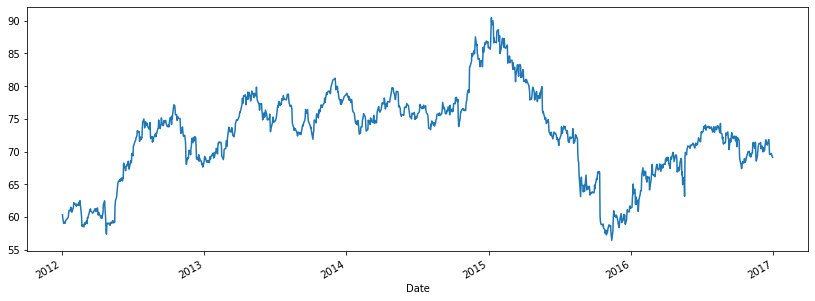

In [76]:


dataframe['Close'].plot(figsize = (14,5))

**We try to find
the average by week using the moving average or rolling mean, which can be
implemented using the pandas library.**

In [77]:
dataframe

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
2012-01-09  59.029999  59.549999  58.919998  59.180000   6679300  51.616215
2012-01-10  59.430000  59.709999  58.980000  59.040001   6907300  51.494109
2012-01-11  59.060001  59.529999  59.040001  59.400002   6365600  51.808098
2012-01-12  59.790001  60.000000  59.400002  59.500000   7236400  51.895316
2012-01-13  59.180000  59.610001  59.009998  59.540001   7729300  51.930204
2012-01-17  59.869999  60.110001  59.520000  59.849998   8500000  52.200581
2012-01-18  59.790001  60.029999  59.650002  60.009998   5911400  52.340131
2012-01-19  59.930000  60.730000  59.750000  60.610001   9234600  52.863447
2012-01-20  60.750000  61.250000  60.669998  61.009998  10378800  53.212321
2012-01-23  60.810001  60.980000  60.509998  60.910000   7134100  53.125104
2012-01-24  60.750000  62.000000  60.750000  61.389999   7362800  53.543754
2012-01-25  61.180000  61.610001  61.040001  61.470001   5915800  53.613531
2012-01-26  61.799999  61.840000  60.770000  60.970001   7436200  53.177436
2012-01-27  60.860001  61.119999  60.540001  60.709999   6287300  52.950665
2012-01-30  60.470001  61.320000  60.349998  61.299999   7636900  53.465257
2012-01-31  61.529999  61.570000  60.580002  61.360001   9761500  53.517590
2012-02-01  61.790001  62.630001  61.790001  62.180000  12130600  54.232785
2012-02-02  62.400002  62.470001  61.820000  61.939999   6211300  54.023458
2012-02-03  62.320000  62.430000  61.700001  62.029999   7727200  54.101956
2012-02-06  61.849998  61.980000  61.700001  61.880001   5480600  53.971129
2012-02-07  61.619999  61.900002  61.619999  61.689999   6084400  53.805411
2012-02-08  61.910000  62.020000  61.230000  61.619999   7260000  53.744358
2012-02-09  61.580002  62.160000  61.580002  61.959999   6453100  54.040903
2012-02-10  61.680000  61.910000  61.380001  61.900002   5501000  53.988573
2012-02-13  62.009998  62.080002  61.730000  61.790001   4175000  53.892632
2012-02-14  61.910000  62.240002  61.790001  62.220001   5173100  54.267674
2012-02-15  62.320000  62.439999  61.590000  61.759998   5833700  53.866464
2012-02-16  61.770000  62.189999  61.700001  62.040001   7256400  54.110679
2012-02-17  62.320000  62.570000  61.910000  62.480000   8191800  54.494442
2012-02-21  60.330002  60.500000  59.669998  60.070000  23894800  52.392464
2012-02-22  59.580002  59.900002  58.369999  58.599998  28630200  51.110343
2012-02-23  58.590000  58.900002  58.209999  58.540001  14880300  51.058014
2012-02-24  58.750000  58.950001  58.500000  58.790001   9925900  51.276061
2012-02-27  58.700001  58.779999  58.290001  58.459999  12258800  50.988237
2012-02-28  58.439999  59.099998  58.349998  58.930000  10761900  51.398167
2012-02-29  58.840000  59.330002  58.720001  59.080002  11484400  51.528997
2012-03-01  59.360001  59.419998  58.639999  58.820000  16283900  51.302226
2012-03-02  58.990002  59.279999  58.799999  59.009998   9848100  51.467941
2012-03-05  58.959999  59.590000  58.750000  59.400002   9651000  51.808098
2012-03-06  59.040001  59.220001  58.750000  58.970001   9057100  51.433056
2012-03-07  59.110001  59.860001  59.110001  59.860001  14916900  52.209305
2012-03-08  59.840000  59.950001  59.450001  59.770000   7795600  52.479736
2012-03-09  59.830002  60.200001  59.830002  60.080002   6292900  52.751926
2012-03-12  60.169998  60.900002  60.090000  60.680000   7576800  53.278741
2012-03-13  60.930000  61.080002  60.520000  61.000000   8734600  53.559710
2012-03-14  60.840000  61.150002  60.689999  61.080002   6375000  53.629954
2012-03-15  60.889999  61.259998  60.779999  61.230000   6755000 

**Roling the window size for 7 days**

In [79]:
dataframe.head(15)

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
2012-01-09  59.029999  59.549999  58.919998  59.180000   6679300  51.616215
2012-01-10  59.430000  59.709999  58.980000  59.040001   6907300  51.494109
2012-01-11  59.060001  59.529999  59.040001  59.400002   6365600  51.808098
2012-01-12  59.790001  60.000000  59.400002  59.500000   7236400  51.895316
2012-01-13  59.180000  59.610001  59.009998  59.540001   7729300  51.930204
2012-01-17  59.869999  60.110001  59.520000  59.849998   8500000  52.200581
2012-01-18  59.790001  60.029999  59.650002  60.009998   5911400  52.340131
2012-01-19  59.930000  60.730000  59.750000  60.610001   9234600  52.863447
2012-01-20  60.750000  61.250000  60.669998  61.009998  10378800  53.212321
2012-01-23  60.810001  60.980000  60.509998  60.910000   7134100  53.125104
2012-01-24  60.750000  62.000000  60.750000  61.389999   7362800  53.543754

In [80]:
dataframe.tail(15)

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2016-12-09  70.269997  70.430000  69.739998  70.080002  10756700  69.568471
2016-12-12  70.070000  71.779999  70.019997  71.669998   9084100  71.146861
2016-12-13  71.669998  72.230003  71.610001  71.800003   8887500  71.275917
2016-12-14  71.900002  72.480003  71.180000  71.339996   8669400  70.819268
2016-12-15  71.220001  71.800003  71.029999  71.080002   7136300  70.561172
2016-12-16  71.070000  71.639999  70.599998  70.980003  17844800  70.461903
2016-12-19  70.839996  71.750000  70.839996  71.580002   5889300  71.057522
2016-12-20  71.730003  71.930000  71.510002  71.820000   6108100  71.295768
2016-12-21  71.660004  72.000000  71.239998  71.239998   5101000  70.720000
2016-12-22  71.239998  71.239998  69.209999  69.589996  12106800  69.082042
2016-12-23  69.430000  69.750000  69.360001  69.540001   4803900  69.032411
2016-12-27  69.300003  69.820000  69.250000  69.699997   4435700  69.191240
2016-12-28  69.940002  70.000000  69.260002  69.309998   4875700  68.804087
2016-12-29  69.209999  69.519997  69.120003  69.260002   4298400  68.754456
2016-12-30  69.120003  69.430000  68.830002  69.120003   6889500  68.615479

In [84]:
# rolling  the window size for every 7 days
#first six rows have values of NaN. This is because the size of the window is seven. Therefore, the record of
#the seventh row is the average of first six rows. Similarly, the eighth row is the
#average of the previous six rows.

dataframe.rolling(7).mean().head(20)

Open       High        Low      Close        Volume  \
Date                                                                   
2012-01-03        NaN        NaN        NaN        NaN           NaN   
2012-01-04        NaN        NaN        NaN        NaN           NaN   
2012-01-05        NaN        NaN        NaN        NaN           NaN   
2012-01-06        NaN        NaN        NaN        NaN           NaN   
2012-01-09        NaN        NaN        NaN        NaN           NaN   
2012-01-10        NaN        NaN        NaN        NaN           NaN   
2012-01-11  59.495714  59.895714  59.074285  59.440000  9.007414e+06   
2012-01-12  59.469999  59.744285  59.007143  59.321429  8.231357e+06   
2012-01-13  59.322857  59.638571  58.941428  59.297143  7.965071e+06   
2012-01-17  59.397143  59.708571  59.105714  59.358572  7.355329e+06   
2012-01-18  59.450000  59.791428  59.217143  59.502857  7.047043e+06   
2012-01-19  59.578572  59.960000  59.335715  59.707143  7.412086e+06   
2012-01-20  59.767143  60.180000  59.577143  59.988571  7.908014e+06   
2012-01-23  60.017143  60.387143  59.787143  60.204285  8.017800e+06   
2012-01-24  60.154286  60.672857  59.979999  60.474285  8.035857e+06   
2012-01-25  60.440000  60.958572  60.270000  60.749999  7.776786e+06   
2012-01-26  60.715714  61.205714  60.448571  60.910000  7.624814e+06   
2012-01-27  60.868572  61.361429  60.575714  61.010000  7.678514e+06   
2012-01-30  60.945715  61.445714  60.661428  61.108571  7.450271e+06   
2012-01-31  61.057143  61.491429  60.648571  61.158571  7.362086e+06   

            Adj Close  
Date                   
2012-01-03        NaN  
2012-01-04        NaN  
2012-01-05        NaN  
2012-01-06        NaN  
2012-01-09        NaN  
2012-01-10        NaN  
2012-01-11  51.842984  
2012-01-12  51.739567  
2012-01-13  51.718386  
2012-01-17  51.771963  
2012-01-18  51.897808  
2012-01-19  52.075984  
2012-01-20  52.321443  
2012-01-23  52.509586  
2012-01-24  52.745077  
2012-01-25  52.985553  
2012-01-26  53.125103  
2012-01-27  53.212323  
2012-01-30  53.298295  
2012-01-31  53.341905

In [82]:
dataframe.rolling(7).mean().tail(20)

Open       High        Low      Close        Volume  \
Date                                                                   
2016-12-02  70.770000  71.241429  70.547143  70.942858  6.984671e+06   
2016-12-05  70.867143  71.255715  70.494286  70.815715  7.431671e+06   
2016-12-06  70.710000  71.075714  70.282857  70.691429  7.937900e+06   
2016-12-07  70.567143  70.951429  70.154285  70.607143  7.918900e+06   
2016-12-08  70.438572  70.824286  70.028571  70.459999  7.852343e+06   
2016-12-09  70.345715  70.720000  69.967143  70.409999  8.056714e+06   
2016-12-12  70.320001  70.870000  69.962856  70.552856  8.375900e+06   
2016-12-13  70.475715  71.052858  70.128571  70.684286  8.692086e+06   
2016-12-14  70.618572  71.265715  70.324285  70.884285  8.426586e+06   
2016-12-15  70.791429  71.467145  70.542857  70.987142  8.334914e+06   
2016-12-16  70.954286  71.608573  70.642856  71.041429  9.889000e+06   
2016-12-19  71.005713  71.730001  70.717141  71.218572  9.752586e+06   
2016-12-20  71.214286  71.944287  70.969999  71.467143  9.088500e+06   
2016-12-21  71.441429  71.975715  71.144285  71.405715  8.519486e+06   
2016-12-22  71.380001  71.834286  70.801427  71.090000  8.979386e+06   
2016-12-23  71.027143  71.444286  70.541428  70.832857  8.427171e+06   
2016-12-27  70.752858  71.161428  70.287142  70.635714  8.041371e+06   
2016-12-28  70.591429  70.927143  70.095714  70.397142  6.188643e+06   
2016-12-29  70.358573  70.608571  69.850001  70.065713  5.961371e+06   
2016-12-30  69.985716  70.251428  69.467144  69.679999  6.073000e+06   

            Adj Close  
Date                   
2016-12-02  69.924566  
2016-12-05  69.799248  
2016-12-06  69.676746  
2016-12-07  69.664819  
2016-12-08  69.590674  
2016-12-09  69.612017  
2016-12-12  69.825051  
2016-12-13  70.026953  
2016-12-14  70.295976  
2016-12-15  70.468990  
2016-12-16  70.522880  
2016-12-19  70.698731  
2016-12-20  70.945487  
2016-12-21  70.884507  
2016-12-22  70.571096  
2016-12-23  70.315831  
2016-12-27  70.120127  
2016-12-28  69.883296  
2016-12-29  69.554286  
2016-12-30  69.171388

In [83]:
# rolling  the window size for every 2 days
dataframe.rolling(2).mean().head(20)

Open       High        Low      Close      Volume  Adj Close
Date                                                                         
2012-01-03        NaN        NaN        NaN        NaN         NaN        NaN
2012-01-04  60.090000  60.704999  59.670000  60.020001  11131050.0  52.348855
2012-01-05  59.779999  59.984999  58.920000  59.564999  11180750.0  51.952007
2012-01-06  59.384998  59.535000  58.619999  59.209999  10418800.0  51.642380
2012-01-09  59.224998  59.500000  58.894998  59.090000   7374350.0  51.537717
2012-01-10  59.229999  59.629999  58.949999  59.110000   6793300.0  51.555162
2012-01-11  59.245001  59.619999  59.010000  59.220001   6636450.0  51.651104
2012-01-12  59.425001  59.765000  59.220001  59.450001   6801000.0  51.851707
2012-01-13  59.485000  59.805000  59.205000  59.520000   7482850.0  51.912760
2012-01-17  59.524999  59.860001  59.264999  59.694999   8114650.0  52.065393
2012-01-18  59.830000  60.070000  59.585001  59.929998   7205700.0  52.270356
2012-01-19  59.860000  60.379999  59.700001  60.310000   7573000.0  52.601789
2012-01-20  60.340000  60.990000  60.209999  60.810000   9806700.0  53.037884
2012-01-23  60.780000  61.115000  60.589998  60.959999   8756450.0  53.168712
2012-01-24  60.780000  61.490000  60.629999  61.149999   7248450.0  53.334429
2012-01-25  60.965000  61.805000  60.895000  61.430000   6639300.0  53.578643
2012-01-26  61.489999  61.725001  60.905000  61.220001   6676000.0  53.395484
2012-01-27  61.330000  61.480000  60.655000  60.840000   6861750.0  53.064051
2012-01-30  60.665001  61.220000  60.444999  61.004999   6962100.0  53.207961
2012-01-31  61.000000  61.445000  60.465000  61.330000   8699200.0  53.491424

<AxesSubplot:xlabel='Date'>

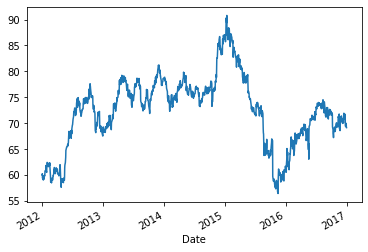

In [86]:
dataframe['Open'].plot()

<AxesSubplot:xlabel='Date'>

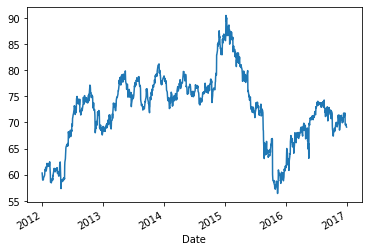

In [88]:
dataframe['Close'].plot()

<AxesSubplot:xlabel='Date'>

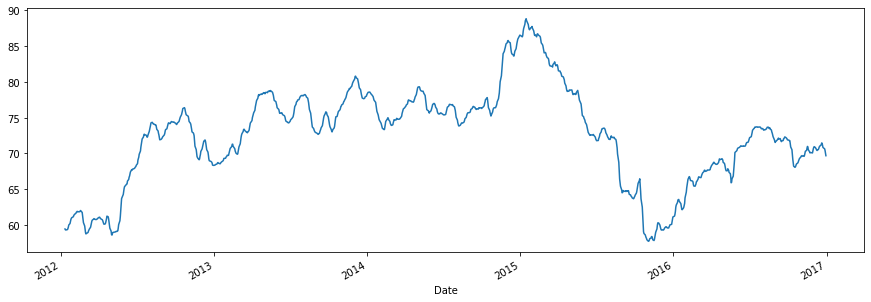

In [87]:
dataframe.rolling(window = 7).mean()['Close'].plot(figsize = (15,5))

<AxesSubplot:xlabel='Date'>

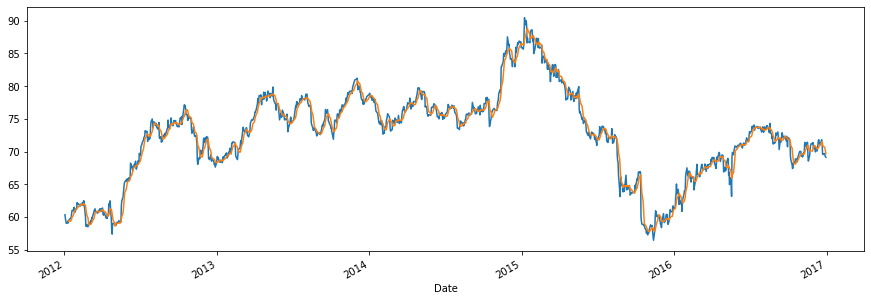

In [89]:
dataframe['Close'].plot()
dataframe.rolling(window = 7).mean()['Close'].plot(figsize = (15,5))

<AxesSubplot:xlabel='Date'>

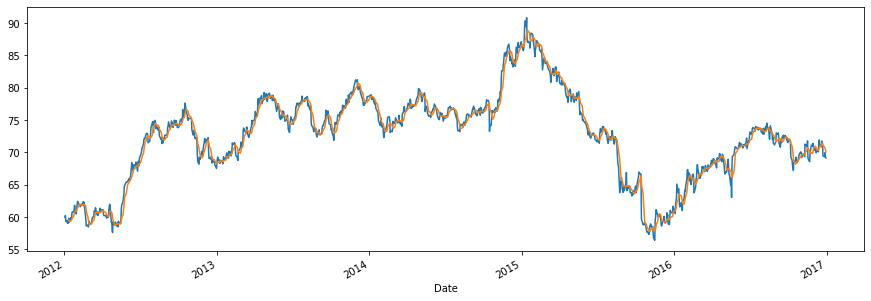

In [90]:
dataframe['Open'].plot()
dataframe.rolling(window = 7).mean()['Open'].plot(figsize = (15,5))

<AxesSubplot:xlabel='Date'>

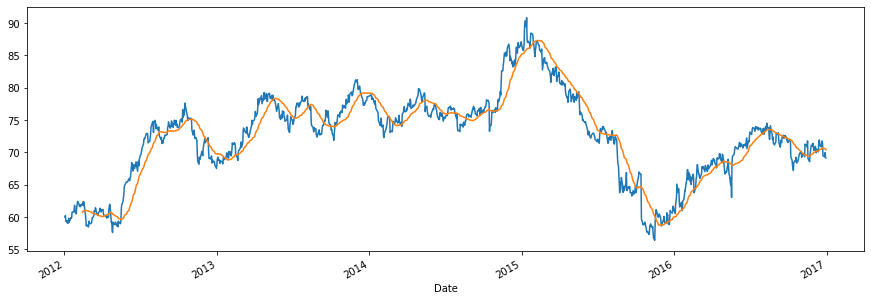

In [91]:
dataframe['Open'].plot()
dataframe.rolling(window = 30).mean()['Open'].plot(figsize = (15,5))

<AxesSubplot:xlabel='Date'>

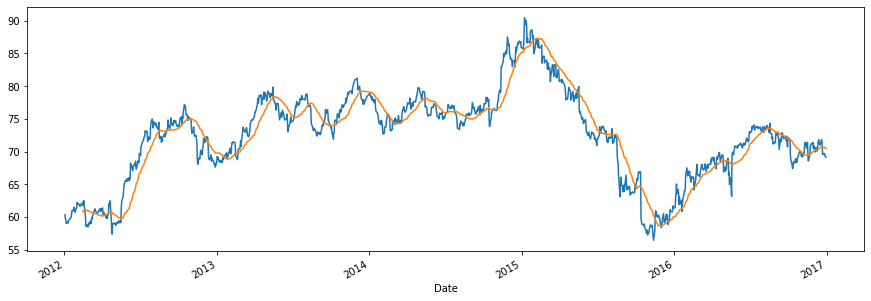

In [92]:
dataframe['Close'].plot()
dataframe.rolling(window = 30).mean()['Close'].plot(figsize = (15,5))

**Expanding Function**

**The expanding function, along with the aggregate function mean, works as a
rolling function in that it computes the average mean of all the previous stock
values at specific time steps. With the expanding function, we will be able to
understand whether the trend of the stock prices is increasing, decreasing, or
stationary.**

<AxesSubplot:xlabel='Date'>

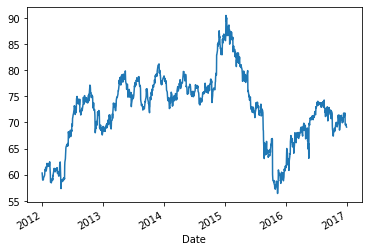

In [93]:
dataframe['Close'].plot()

<AxesSubplot:xlabel='Date'>

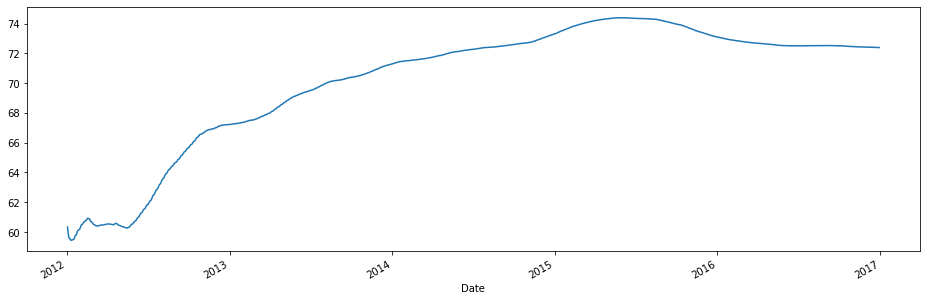

In [94]:
dataframe['Close'].expanding(min_periods = 1).mean().plot(figsize = (16,5))

<AxesSubplot:xlabel='Date'>

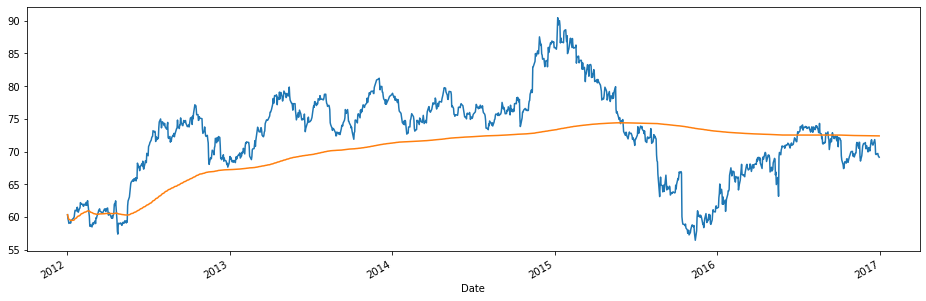

In [97]:
dataframe['Close'].plot()
dataframe['Close'].expanding(min_periods = 1).mean().plot(figsize = (16,5))

**The StatsModels library
consists of a huge range of statistical tests and mapping and plotting functions
for different types of datasets and estimators.**

In [98]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


**The key components of time series analysis,
which are given here:**

**Trend**

**Seasonality**

**Cyclical patterns**

**Irregular patterns**

**Trend**

A trend pattern in time series data usually has the following characteristics:
    
        - A gradual shift or movement to a relatively higher or lower value over a  long period of time

         - When the time series analysis shows a general pattern that is upward, we call it an uptrend

         - When the trend pattern exhibits a general pattern that is downward, we call it a downtrend

         - If there is no trend, we call it a horizontal or stationary trend

**Seasonality**

**A seasonal pattern in time series data usually has the following characteristics:

     - Upward or downward swings

     - A repeating pattern within a fixed time period

     - It is usually observed within one year**

**An example of a seasonal pattern would be if you live in a country with cold
winters and hot summers, the amount you spend on air conditioning is likely to
be high in summer and low in winter.**

**Cyclical patterns**
      -  A cyclical pattern of time series data usually has the following characteristics:
      
      -  It has repeating up and down movements
      -  It usually goes on over a year
      -  It does not have a fixed period
      -  It is much harder to predict


**Irregular patterns**

      -An irregular pattern usually has the following characteristics:
       -It is erratic, unsystematic, and has residual fluctuations
       -It has a short duration and does not repeat
        -It is caused by random variations or unforeseen events
        -It has a lot of white noise

**ETS decomposition**

In [100]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [101]:
dataframe = pd.read_csv(r'C:\Users\kiran\Desktop\Bhaskar\DataScience\ml_projects\Finance_project\Chapter3\walmart_stock.csv',index_col = 'Date')
dataframe.index = pd.to_datetime(dataframe.index)

In [102]:
dataframe.head()

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
2012-01-09  59.029999  59.549999  58.919998  59.180000   6679300  51.616215

C:\Users\kiran\AppData\Local\Temp/ipykernel_7644/651469062.py:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(dataframe['Open'],freq = 12)


<Figure size 432x288 with 0 Axes>

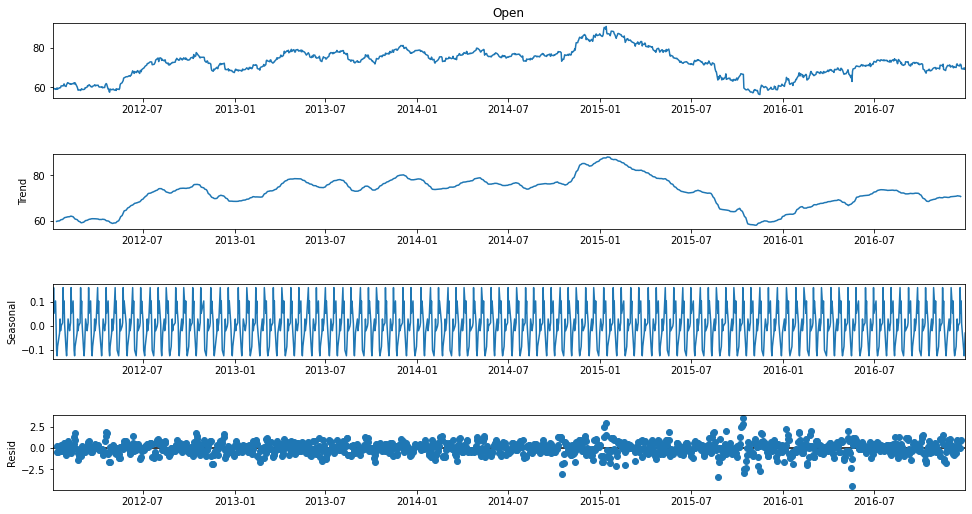

In [105]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(dataframe['Open'],freq = 12)

fig = plt.figure()

fig = decomposition.plot()

fig.set_size_inches(15,8)

**ARIMA MODEL**

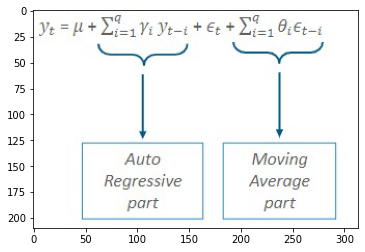

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
image = mpimg.imread(r"C:\Users\kiran\Desktop\Bhaskar\DataScience\ARIMA.png")
plt.imshow(image)
plt.show()

ARIMA (p,i,q) basically denotes an ARIMA model with p autoregressive lags, q
moving average lags, and a difference in the order of i. For the mathematical
representation of ARIMA, we use the i notation for the differencing value. 

When we implement this with the help of Python, however, we will be using the d
notation.


To select the values of p and q for the autoregressive and moving average
models, we will have to use the concepts of AutoCorrelation Function (ACF)
and Partial Auto Correlation Function (PACF).


ACF and PACF will be discussed later on as we move ahead with the implementation of the forecasting
technique using ARIMA.

**ARIMA code**
The general process for the ARIMA model when used for forecasting is as
follows:

1. The first step is to visualize the time series data to discover the trends and
find out whether the time series data is seasonal.

2. As we know, to apply the ARIMA model, we need to use stationary data.

The second step, therefore, is to convert the non-stationary data into
stationary data using the Dickey Fuller Test.

3. We then select the p and q values for ARIMA (p,i,q) using ACF and PACF.

4. The next step is to construct the ARIMA model.

5. Finally, we use the model for the prediction.

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv(r'C:\Users\kiran\Desktop\Bhaskar\DataScience\ml_projects\Finance_project\Chapter3\walmart_stock.csv')


In [3]:
df.head()

Date       Open       High        Low      Close    Volume  Adj Close
0  2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
1  2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2  2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
3  2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
4  2012-01-09  59.029999  59.549999  58.919998  59.180000   6679300  51.616215

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Volume     1258 non-null   int64  
 6   Adj Close  1258 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Volume     1258 non-null   int64         
 6   Adj Close  1258 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 68.9 KB


In [8]:
df.set_index('Date',inplace = True)

In [9]:
df.head(15)

Open       High        Low      Close    Volume  Adj Close
Date                                                                       
2012-01-03  59.970001  61.060001  59.869999  60.330002  12668800  52.619235
2012-01-04  60.209999  60.349998  59.470001  59.709999   9593300  52.078475
2012-01-05  59.349998  59.619999  58.369999  59.419998  12768200  51.825539
2012-01-06  59.419998  59.450001  58.869999  59.000000   8069400  51.459220
2012-01-09  59.029999  59.549999  58.919998  59.180000   6679300  51.616215
2012-01-10  59.430000  59.709999  58.980000  59.040001   6907300  51.494109
2012-01-11  59.060001  59.529999  59.040001  59.400002   6365600  51.808098
2012-01-12  59.790001  60.000000  59.400002  59.500000   7236400  51.895316
2012-01-13  59.180000  59.610001  59.009998  59.540001   7729300  51.930204
2012-01-17  59.869999  60.110001  59.520000  59.849998   8500000  52.200581
2012-01-18  59.790001  60.029999  59.650002  60.009998   5911400  52.340131
2012-01-19  59.930000  60.730000  59.750000  60.610001   9234600  52.863447
2012-01-20  60.750000  61.250000  60.669998  61.009998  10378800  53.212321
2012-01-23  60.810001  60.980000  60.509998  60.910000   7134100  53.125104
2012-01-24  60.750000  62.000000  60.750000  61.389999   7362800  53.543754

In [10]:
timeseries = df['Open']

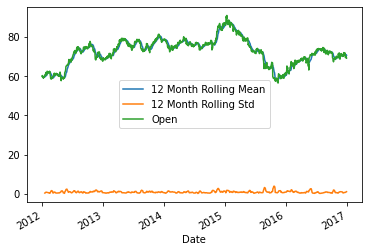

In [11]:
timeseries.rolling(12).mean().plot(label = '12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label = '12 Month Rolling Std')
timeseries.plot()
plt.legend()

In [13]:
# show all rows the output

pd. set_option('display.max_columns', None) # or 1000.
pd. set_option('display.max_rows', None) # or 1000

timeseries.rolling(12).mean()

Date
2012-01-03          NaN
2012-01-04          NaN
2012-01-05          NaN
2012-01-06          NaN
2012-01-09          NaN
2012-01-10          NaN
2012-01-11          NaN
2012-01-12          NaN
2012-01-13          NaN
2012-01-17          NaN
2012-01-18          NaN
2012-01-19    59.585833
2012-01-20    59.650833
2012-01-23    59.700833
2012-01-24    59.817500
2012-01-25    59.964167
2012-01-26    60.195000
2012-01-27    60.314167
2012-01-30    60.431667
2012-01-31    60.576667
2012-02-01    60.794167
2012-02-02    61.005000
2012-02-03    61.215834
2012-02-06    61.375833
2012-02-07    61.448333
2012-02-08    61.540000
2012-02-09    61.609167
2012-02-10    61.650833
2012-02-13    61.668333
2012-02-14    61.755833
2012-02-15    61.910000
2012-02-16    61.930000
2012-02-17    61.974167
2012-02-21    61.801667
2012-02-22    61.573333
2012-02-23    61.301667
2012-02-24    61.062500
2012-02-27    60.795000
2012-02-28    60.533333
2012-02-29    60.296667
2012-03-01    60.075834
2012-03-02 

C:\Users\kiran\AppData\Local\Temp/ipykernel_1940/4151662718.py:5: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df['Open'], freq = 12)


<Figure size 432x288 with 0 Axes>

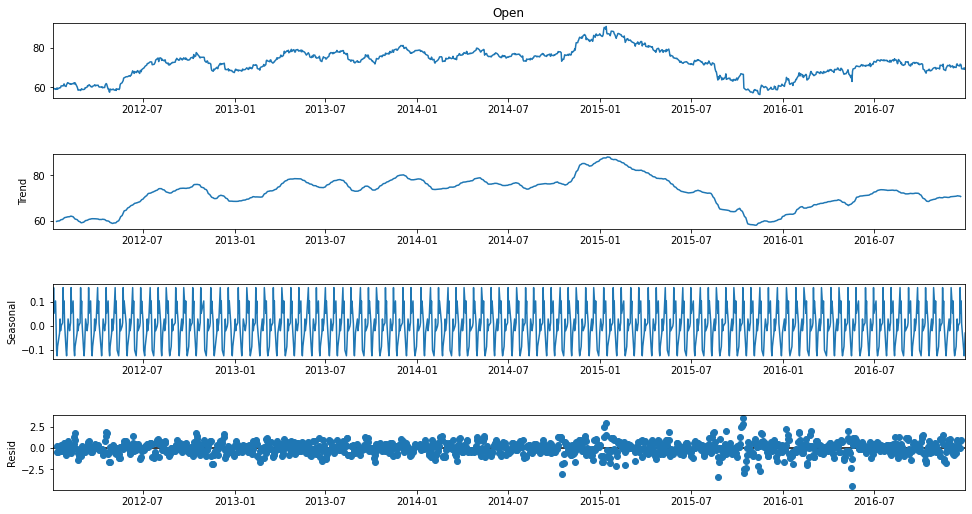

In [14]:
# Now the next step is to use   is to use ETS decomposition to 
# visuaize the general trend of the data

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Open'], freq = 12)
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15,8)


**The next step is to find out whether the dataset is stationary. To do this,
we will define a method to check whether the time series data is stationary using the Dickey Fuller library, which is called adfuller.**

**This is present in the statsmodels library. Based on the p value that's returned, we will decide whether the data is stationary or not.**

In [36]:
from statsmodels.tsa.stattools import adfuller
# Store in a function for later use!
def adf_check(time_series):
    result = adfuller(time_series)
    print('Augmented Dickey-Fuller Test:',result)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
        if result[1] <= 0.05:
            print("Since Pvalue is less than 0.05, there is strong evidence against the null hypothesis, data is stationary") 
        else:
            print("Since Pvalue is more than 0.05, weak evidence against null hypothesis, so The data is non stationary")

In [26]:
adf_check(df['Open'])

Augmented Dickey-Fuller Test: (-2.3151731491483143, 0.16712101621346787, 11, 1246, {'1%': -3.4356090875394525, '5%': -2.863862410805964, '10%': -2.568006480268158}, 2796.9865119061114)
ADF Test Statistic : -2.3151731491483143
Since Pvalue is more than 0.05, weak evidence against null hypothesis, so The data is non stationary
p-value : 0.16712101621346787
Since Pvalue is more than 0.05, weak evidence against null hypothesis, so The data is non stationary
#Lags Used : 11
Since Pvalue is more than 0.05, weak evidence against null hypothesis, so The data is non stationary
Number of Observations Used : 1246
Since Pvalue is more than 0.05, weak evidence against null hypothesis, so The data is non stationary


**From the preceding output, we can see that the value of p is larger than 0.05, so
we decide that the data is not stationary. To make the data stationary, we will
follow the differencing technique, which we have already discussed. In
differencing, the first difference of a time series is the series of changes from one
period to the next. We take away this change by using a shift operation**

In [28]:
print(df['Open'])

Date
2012-01-03    59.970001
2012-01-04    60.209999
2012-01-05    59.349998
2012-01-06    59.419998
2012-01-09    59.029999
2012-01-10    59.430000
2012-01-11    59.060001
2012-01-12    59.790001
2012-01-13    59.180000
2012-01-17    59.869999
2012-01-18    59.790001
2012-01-19    59.930000
2012-01-20    60.750000
2012-01-23    60.810001
2012-01-24    60.750000
2012-01-25    61.180000
2012-01-26    61.799999
2012-01-27    60.860001
2012-01-30    60.470001
2012-01-31    61.529999
2012-02-01    61.790001
2012-02-02    62.400002
2012-02-03    62.320000
2012-02-06    61.849998
2012-02-07    61.619999
2012-02-08    61.910000
2012-02-09    61.580002
2012-02-10    61.680000
2012-02-13    62.009998
2012-02-14    61.910000
2012-02-15    62.320000
2012-02-16    61.770000
2012-02-17    62.320000
2012-02-21    60.330002
2012-02-22    59.580002
2012-02-23    58.590000
2012-02-24    58.750000
2012-02-27    58.700001
2012-02-28    58.439999
2012-02-29    58.840000
2012-03-01    59.360001
2012-03-02 

In [30]:
print(df['Open'].shift(1))

Date
2012-01-03          NaN
2012-01-04    59.970001
2012-01-05    60.209999
2012-01-06    59.349998
2012-01-09    59.419998
2012-01-10    59.029999
2012-01-11    59.430000
2012-01-12    59.060001
2012-01-13    59.790001
2012-01-17    59.180000
2012-01-18    59.869999
2012-01-19    59.790001
2012-01-20    59.930000
2012-01-23    60.750000
2012-01-24    60.810001
2012-01-25    60.750000
2012-01-26    61.180000
2012-01-27    61.799999
2012-01-30    60.860001
2012-01-31    60.470001
2012-02-01    61.529999
2012-02-02    61.790001
2012-02-03    62.400002
2012-02-06    62.320000
2012-02-07    61.849998
2012-02-08    61.619999
2012-02-09    61.910000
2012-02-10    61.580002
2012-02-13    61.680000
2012-02-14    62.009998
2012-02-15    61.910000
2012-02-16    62.320000
2012-02-17    61.770000
2012-02-21    62.320000
2012-02-22    60.330002
2012-02-23    59.580002
2012-02-24    58.590000
2012-02-27    58.750000
2012-02-28    58.700001
2012-02-29    58.439999
2012-03-01    58.840000
2012-03-02 

In [31]:
df['open first difference '] = df['Open'] - df['Open'].shift(1)

In [32]:
df['open first difference '].head()

Date
2012-01-03         NaN
2012-01-04    0.239998
2012-01-05   -0.860001
2012-01-06    0.070000
2012-01-09   -0.389999
Name: open first difference , dtype: float64

**After the first differencing, we will pass the new dataset column, Open First
Difference, to the same method of the Dickey Fuller Test to see whether the data is stationary:**

In [35]:
adf_check(df['open first difference '].dropna())

Augmented Dickey-Fuller Test: (-10.395143169790542, 1.9741449125945408e-18, 10, 1246, {'1%': -3.4356090875394525, '5%': -2.863862410805964, '10%': -2.568006480268158}, 2798.559774603328)
ADF Test Statistic : -10.395143169790542
Since Pvalue is less than 0.05, there is strong evidence against the null hypothesis, data is null hypothesis
p-value : 1.9741449125945408e-18
Since Pvalue is less than 0.05, there is strong evidence against the null hypothesis, data is null hypothesis
#Lags Used : 10
Since Pvalue is less than 0.05, there is strong evidence against the null hypothesis, data is null hypothesis
Number of Observations Used : 1246
Since Pvalue is less than 0.05, there is strong evidence against the null hypothesis, data is null hypothesis


**We then set the differencing (d) value in the Arima (p,d,q) model as one, as we have only observed one difference to establish whether the data is stationary**

<AxesSubplot:xlabel='Date'>

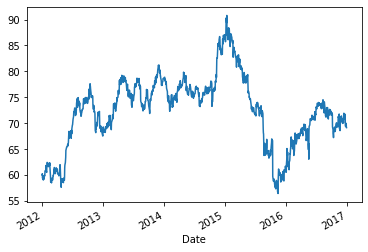

In [38]:
df["Open"].plot()

<AxesSubplot:xlabel='Date'>

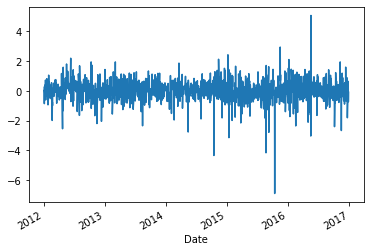

In [39]:
df['open first difference '].plot()

**We now need to find
the values of p and q, which are the lags for the AR and the MA models.
To find the p and q parameters, we will be using ACF and PACF.**

Autocorrelation interpretation

The actual interpretation of an autocorrelation plot and how it relates to ARIMA models can get a bit complicated, but there are some basic common methods we can use. Our main priority here is to try and figure out whether we will use the AR, MA, or both components of the ARIMA model, as well as how many lags
we should use. In general, you would use either AR or MA; using both is less
common.

If the autocorrelation plot shows a positive autocorrelation at the first lag
(lag-1), then we should use the AR terms in relation to the lag
If the autocorrelation plot shows a negative autocorrelation at the first lag,
then we should use the MA terms

Partial autocorrelation (PACF)

In general, a partial correlation is a conditional correlation. 

It is the correlation between two variables under the assumption that we know and take into account the values of another set of variables. For instance, consider a regression context in which y is the response variable and x1, x2, and x3 are predictor variables. 

The partial correlation between y and x3 is the correlation between the variables that specifies how both y and x3 are related to x1 and x2.

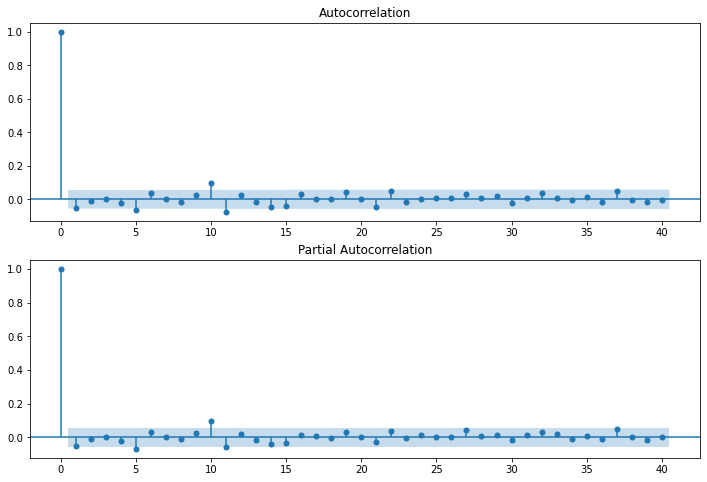

In [43]:
fig = plt.figure(figsize = (12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(df['open first difference '].iloc[13:],lags = 40,ax = ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(df['open first difference '].iloc[13:], lags=40, ax=ax2)

p: The number of lag observations included in the model. This is the
number before the first inverted bar in the ACF (we begin counting from
zero).

d: The number of times that the raw observations are differenced, also
called the degree of differencing.

q: The size of the moving average window, also called the order of moving
average. This is the number before the first inverted bar in the PACF (again,
we begin counting from zero).

From the preceding diagram, we can see that the value of both p and q is 0. We
will provide these parameters when we call the ARIMA model.

In [44]:
# For non seasonal data

from statsmodels.tsa.arima_model import ARIMA

In [45]:
help(ARIMA)

Help on class ARIMA in module statsmodels.tsa.arima_model:

class ARIMA(ARMA)
 |  ARIMA(endog, order, exog=None, dates=None, freq=None, missing='none')
 |  
 |  Autoregressive Integrated Moving Average ARIMA(p,d,q) Model
 |  
 |  .. deprecated:: 0.12
 |     Use statsmodels.tsa.arima.model.ARIMA instead
 |  
 |  Parameters
 |  ----------
 |  endog : array_like
 |      The endogenous variable.
 |  order : iterable
 |      The (p,d,q) order of the model for the number of AR parameters,
 |      differences, and MA parameters to use.
 |  exog : array_like, optional
 |      An optional array of exogenous variables. This should *not* include a
 |      constant or trend. You can specify this in the `fit` method.
 |  dates : array_like, optional
 |      An array-like object of datetime objects. If a pandas object is given
 |      for endog or exog, it is assumed to have a DateIndex.
 |  freq : str, optional
 |      The frequency of the time-series. A Pandas offset or 'B', 'D', 'W',
 |      'M',

## For Seasonal Data

Usually, when we find a seasonal pattern, we should use another model, which is
called the seasonal ARIMAX model.

The basic difference between the seasonal ARIMAX model and the ARIMA model is that we need to provide an extra parameter for the seasonal ARIMAX model, which is seasonal_order. 

This parameter will be in tuple form, (p,d,q,S), where p and q are the lags for the autoregressive and moving average models, d is the differencing value, and S is the number of months in a year, which is 12.

In [47]:
# we have seasonal data i'e (P,D,Q,S)

model = sm.tsa.statespace.SARIMAX(df['Open'],order =(0,1,0),seasonal_order = (0,1,0,12))
results = model.fit()
print(results.summary())

C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\kiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


                                     SARIMAX Results                                      
Dep. Variable:                               Open   No. Observations:                 1258
Model:             SARIMAX(0, 1, 0)x(0, 1, 0, 12)   Log Likelihood               -1827.327
Date:                            Thu, 16 Dec 2021   AIC                           3656.654
Time:                                    19:33:43   BIC                           3661.781
Sample:                                         0   HQIC                          3658.581
                                           - 1258                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         1.1025      0.025     44.135      0.000       1.054       1.151
Ljung-Box (L1) (Q):                

**After we create the model, we need to make a prediction and compare the
predicted data and the real data by plotting it. To do this, we use the predict
method, which is present in the seasonal ARIMAX model. We provide the row
number from which the prediction needs to be started. We can change the value
to make different predictions.**

<AxesSubplot:xlabel='Date'>

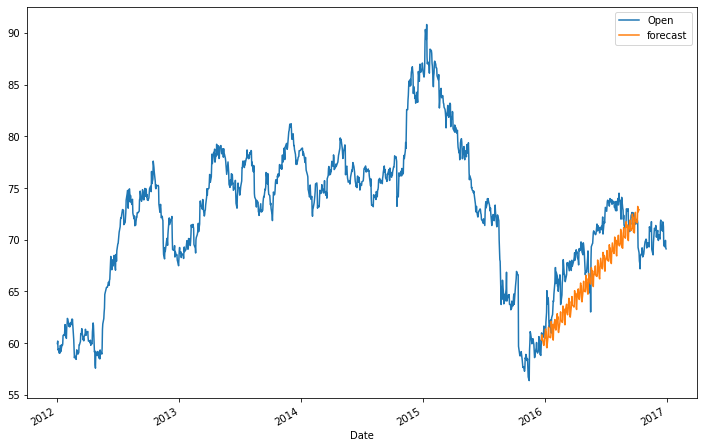

In [49]:
df['forecast'] = results.predict(start = 1000, end = 1200 , dynamic = True)
df[['Open','forecast']].plot(figsize = (12,8))

<AxesSubplot:xlabel='Date'>

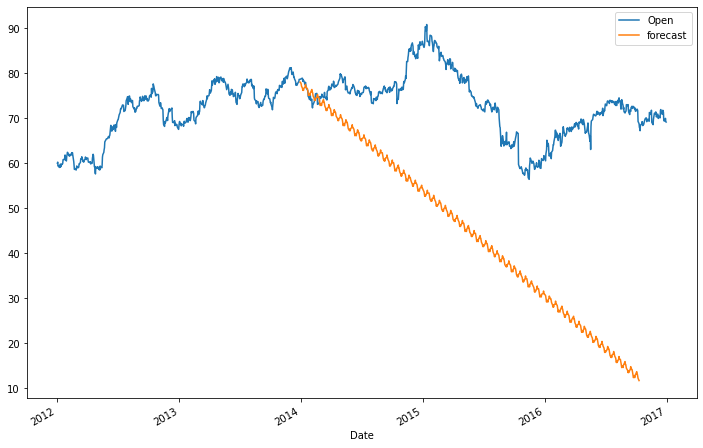

In [54]:
df['forecast'] = results.predict(start = 500, end = 1200 , dynamic = True)
df[['Open','forecast']].plot(figsize = (12,8))

# Chapter 4

- Calculating the return of a single security
- Calculating the return of a portfolio of securities
- Risk, standard deviation, and variance
- Correlation and covariance

in order to access data stored on a web server, you'll need to connect to its
application programming interface (API). In our case, we will need a
financial data API. We can also call these online financial data sources;
examples of these include the IEX, Morningstar, Alpha Vantage, and the Quandl
API.

**Thepandas datareader is an example of a module that will help you retrieve data from financial data sources and prepare it for analysis.**

**In order to read the financial data from the API, we will be using the pandasdatareader library. To use this, we need to install this library; type the following command in the Anaconda Command Prompt:**

In [77]:
#In order to read the financial data from the API, we will be using the pandasdatareader
# library.

!pip install pandas_datareader

In [91]:
import pandas as pd
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data as wb
import os

In [ ]:
# name : name of the dataset, data_dource: name of API ,start :start reading from the financila data

GOOGL = wb.DataReader('AAPL', data_source = 'iex',start = '2015-1-1')

In [96]:
MSFT = pd.read_csv(r'C:\Users\kiran\Desktop\Bhaskar\DataScience\ml_projects\Finance_project\Chapter4\MSFT_stock.csv',index_col = 'Date')

In [97]:
MSFT.shape

(4517, 6)

In [98]:
MSFT.head(20)

Open      High       Low     Close  Adj Close    Volume
Date                                                                    
1999-12-31  58.750000  58.87500  58.12500  58.37500  38.771053  12517600
2000-01-03  58.687500  59.31250  56.00000  58.28125  38.708794  53228400
2000-01-04  56.781250  58.56250  56.12500  56.31250  37.401215  54119000
2000-01-05  55.562500  58.18750  54.68750  56.90625  37.795563  64059600
2000-01-06  56.093750  56.93750  54.18750  55.00000  36.529484  54976600
2000-01-07  54.312500  56.12500  53.65625  55.71875  37.006855  62013600
2000-01-10  56.718750  56.84375  55.68750  56.12500  37.276661  44963600
2000-01-11  55.750000  57.12500  54.34375  54.68750  36.321934  46743600
2000-01-12  54.250000  54.43750  52.21875  52.90625  35.138874  66532400
2000-01-13  52.187500  54.31250  50.75000  53.90625  35.803043  83144000
2000-01-14  53.593750  56.96875  52.87500  56.12500  37.276661  73416400
2000-01-18  55.906250  58.25000  55.87500  57.65625  38.293682  81483600
2000-01-19  55.250000  55.75000  53.00000  53.50000  35.533215  97568200
2000-01-20  53.531250  54.84375  52.93750  53.00000  35.201126  56349800
2000-01-21  53.500000  53.62500  51.62500  51.87500  34.453938  68416200
2000-01-24  51.898399  52.84375  50.40625  50.62500  33.623737  63597600
2000-01-25  50.500000  51.93750  49.78125  51.40625  34.142609  59823200
2000-01-26  51.218750  51.75000  49.56250  49.68750  33.001049  49365000
2000-01-27  49.945301  50.59375  48.62500  49.37500  32.793507  63654800
2000-01-28  49.062500  50.12500  48.62500  49.12500  32.627457  58225400

In [99]:
MSFT['Close']

Date
1999-12-31    58.375000
2000-01-03    58.281250
2000-01-04    56.312500
2000-01-05    56.906250
2000-01-06    55.000000
2000-01-07    55.718750
2000-01-10    56.125000
2000-01-11    54.687500
2000-01-12    52.906250
2000-01-13    53.906250
2000-01-14    56.125000
2000-01-18    57.656250
2000-01-19    53.500000
2000-01-20    53.000000
2000-01-21    51.875000
2000-01-24    50.625000
2000-01-25    51.406250
2000-01-26    49.687500
2000-01-27    49.375000
2000-01-28    49.125000
2000-01-31    48.937500
2000-02-01    51.468750
2000-02-02    50.406250
2000-02-03    51.812500
2000-02-04    53.281250
2000-02-07    53.312500
2000-02-08    54.968750
2000-02-09    52.000000
2000-02-10    53.000000
2000-02-11    49.968750
2000-02-14    49.812500
2000-02-15    49.281250
2000-02-16    48.812500
2000-02-17    49.812500
2000-02-18    47.531250
2000-02-22    46.906250
2000-02-23    47.125000
2000-02-24    47.375000
2000-02-25    45.656250
2000-02-28    45.781250
2000-02-29    44.687500
2000-03-01 

In [100]:
MSFT['Close'].shift(1)

Date
1999-12-31          NaN
2000-01-03    58.375000
2000-01-04    58.281250
2000-01-05    56.312500
2000-01-06    56.906250
2000-01-07    55.000000
2000-01-10    55.718750
2000-01-11    56.125000
2000-01-12    54.687500
2000-01-13    52.906250
2000-01-14    53.906250
2000-01-18    56.125000
2000-01-19    57.656250
2000-01-20    53.500000
2000-01-21    53.000000
2000-01-24    51.875000
2000-01-25    50.625000
2000-01-26    51.406250
2000-01-27    49.687500
2000-01-28    49.375000
2000-01-31    49.125000
2000-02-01    48.937500
2000-02-02    51.468750
2000-02-03    50.406250
2000-02-04    51.812500
2000-02-07    53.281250
2000-02-08    53.312500
2000-02-09    54.968750
2000-02-10    52.000000
2000-02-11    53.000000
2000-02-14    49.968750
2000-02-15    49.812500
2000-02-16    49.281250
2000-02-17    48.812500
2000-02-18    49.812500
2000-02-22    47.531250
2000-02-23    46.906250
2000-02-24    47.125000
2000-02-25    47.375000
2000-02-28    45.656250
2000-02-29    45.781250
2000-03-01 

In [102]:
pip install yfinance

  Created wheel for multitasking: filename=multitasking-0.0.10-py3-none-any.whl size=8500 sha256=379e996dfea497ba9f133895f2d6ae405a90473acd69367e09398ee0330faa34
  Stored in directory: c:\users\kiran\appdata\local\pip\cache\wheels\f2\b5\2c\59ba95dcf854e542944c75fe3da584e4e3833b319735a0546c
Successfully built multitasking
Note: you may need to restart the kernel to use updated packages.


In [103]:
import pandas as pd
import yfinance as yf

In [104]:
df_yahoo = yf.download('AAPL',start = '2000-01-01',end = '2010-12-31',progress = False)

In [105]:
df_yahoo

Open       High        Low      Close  Adj Close      Volume
Date                                                                         
2000-01-03   0.936384   1.004464   0.907924   0.999442   0.856887   535796800
2000-01-04   0.966518   0.987723   0.903460   0.915179   0.784643   512377600
2000-01-05   0.926339   0.987165   0.919643   0.928571   0.796124   778321600
2000-01-06   0.947545   0.955357   0.848214   0.848214   0.727229   767972800
2000-01-07   0.861607   0.901786   0.852679   0.888393   0.761677   460734400
2000-01-10   0.910714   0.912946   0.845982   0.872768   0.748281   505064000
2000-01-11   0.856585   0.887277   0.808036   0.828125   0.710005   441548800
2000-01-12   0.848214   0.852679   0.772321   0.778460   0.667425   976068800
2000-01-13   0.843610   0.881696   0.825893   0.863839   0.740625  1032684800
2000-01-14   0.892857   0.912946   0.887277   0.896763   0.768853   390376000
2000-01-18   0.901786   0.946429   0.896763   0.928013   0.795646   459177600
2000-01-19   0.943080   0.970982   0.922991   0.951451   0.815741   597643200
2000-01-20   1.031250   1.084821   1.013393   1.013393   0.868848  1831132800
2000-01-21   1.020089   1.020089   0.983817   0.993862   0.852103   495924800
2000-01-24   0.968192   1.006696   0.938616   0.948661   0.813349   440876800
2000-01-25   0.937500   1.010045   0.914063   1.002232   0.859279   497145600
2000-01-26   0.982143   1.019531   0.979911   0.983817   0.843490   367158400
2000-01-27   0.971540   1.008929   0.955357   0.982143   0.842055   340144000
2000-01-28   0.965960   0.989955   0.898438   0.907366   0.777944   423348800
2000-01-31   0.901786   0.927455   0.843750   0.926339   0.794211   701680000
2000-02-01   0.928571   0.937500   0.892857   0.895089   0.767418   318035200
2000-02-02   0.899554   0.911830   0.866071   0.882254   0.756414   464195200
2000-02-03   0.895647   0.930804   0.895089   0.922433   0.790862   475193600
2000-02-04   0.928013   0.982143   0.925223   0.964286   0.826745   425320000
2000-02-07   0.964286   1.020089   0.945871   1.018415   0.873154   441067200
2000-02-08   1.017857   1.036830   0.993304   1.025670   0.879374   408643200
2000-02-09   1.018973   1.045759   1.003906   1.005580   0.862149   299364800
2000-02-10   1.007813   1.016741   0.982143   1.013393   0.868848   302982400
2000-02-11   1.014509   1.018973   0.966518   0.970982   0.832486   212251200
2000-02-14   0.976004   1.034598   0.969866   1.034040   0.886550   367539200
2000-02-15   1.029018   1.070871   1.028460   1.062500   0.910951   485744000
2000-02-16   1.051339   1.054688   1.001116   1.018973   0.873632   378246400
2000-02-17   1.028460   1.031250   1.010045   1.025670   0.879374   289497600
2000-02-18   1.023438   1.030134   0.989955   0.993304   0.851624   233441600
2000-02-22   0.983259   1.044085   0.952567   1.016183   0.871240   422296000
2000-02-23   1.011021   1.062500   0.991071   1.037946   0.889899   473099200
2000-02-24   1.047433   1.063616   0.997768   1.028599   0.881885   376432000
2000-02-25   1.025112   1.044643   0.983259   0.985491   0.844926   249144000
2000-02-28   0.983259   1.026786   0.967634   1.011161   0.866934   328328000
2000-02-29   1.013951   1.046875   1.005022   1.023438   0.877460   368961600
2000-03-01   1.058594   1.179129   1.058036   1.163504   0.997548  1077003200
2000-03-02   1.133929   1.142299   1.077567   1.089286   0.933916   311259200
2000-03-03   1.114955   1.144950   1.071429   1.142857   0.979846   323366400
2000-03-06   1.125000   1.152902   1.116071   1.122210   0.962144   210560000
2000-03-07   1.128906   1.137835   1.081473   1.097098   0.940613   273011200
2000-03-08   1.097098   1.106585   1.058594   1.089286   0.933916   271230400
2000-03-09   1.079241   1.116071   1.055804   1.091518   0.935829   276718400
2000-03-10   1.086496   1.142299   1.080357   1.122768   0.962622   248606400
2000-03-13   1.090402   1.129464   1.066964   1.083147   0.928652   303956800
2000-03-14   1.082310   1.109375   1.01